# 0305 머신러닝 과제 _ 임소영

- crim : 마을별 1인당 범죄율
- zn : 25,000평방피트 이상의 부지에 대해 구역이 지정된 주거용 토지의 비율입니다.
- indus : 도시별 비소매업 면적의 비율.
- chas : 찰스 강 더미 변수(지역이 강을 경계로 하는 경우 1, 그렇지 않으면 0).
- nox : 질소 산화물 농도(천만 개당 부품).
- rm : 주거지당 평균 방 수입니다.
- age : 1940년 이전에 지어진 소유주가 거주하는 유닛의 비율입니다.
- dis : 보스턴의 5개 고용 센터까지의 거리의 가중 평균.
- rad : 방사형 고속도로에 대한 접근성 지수.
- tax : 10,000달러당 전체 가치의 재산세율.
- ptratio : 도시별 학생 대 교사 비율입니다.
- black : 1000(Bk - 0.63)^2 여기서 Bk는 도시별 흑인 비율입니다.
- lstat : 인구의 하위 상태(백분율)입니다.
- medv : 소유주가 거주하는 주택의 중간값($1000대)

### 모듈 로딩 & 데이터 전처리

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
file = '../data/HousingData.csv'
data = pd.read_csv(file)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [145]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [146]:
data.dropna(inplace=True)

In [147]:
data.isna().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [148]:
data.duplicated().sum()

0

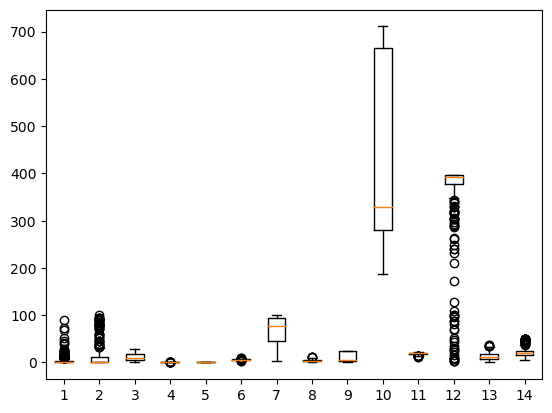

In [149]:
plt.boxplot(data)
plt.show()

In [150]:
def print_flier(insert_data):
    q1 = insert_data.quantile(0.25)
    q3 = insert_data.quantile(0.75)
    iqr = q3 - q1
    #print(f"[ q1 ] \n{q1}\n\n[ q3 ] \n{q3}\n")
    #print(f"[ iqr의 범위 ]\n{iqr}\n")

    #print('------------------ 이상값이 될 기준 계산 ------------------\n')

    lower = q1 - 1.5 * iqr
    #print(f"[ lower의 값 ]\n{lower}\n")
    upper = q3 + 1.5 * iqr
    #print(f"[ upper의 값 ]\n{upper}\n")

    mask = insert_data < lower
    print(f"[ lower의 개수 ]\n{mask.sum()}\n")
    mask2 = insert_data > upper
    print(f"[ upper의 개수 ]\n{mask2.sum()}\n")

    return lower, upper

lower, upper = print_flier(data)

[ lower의 개수 ]
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          6
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO    12
B          58
LSTAT       0
MEDV        0
dtype: int64

[ upper의 개수 ]
CRIM       54
ZN         50
INDUS       0
CHAS       27
NOX         0
RM         17
AGE         0
DIS         4
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       6
MEDV       26
dtype: int64


In [151]:
def drop_flier(insert_data, col_name):
    global lower
    global upper
    # 어쨰서 둘의 반환값이 같을까? 컬럼별로 적용하지 않아서 그런걸까?
    # data[~mask].shape
    # data[mask].shape
    # 이렇게 하면 데이터 프레임 전체에서 조건이 맞는걸 구해야하기 때문에 내가 의도한 바와 맞지 않는다.
    # 그래서 컬럼별로 필터링을 적용해주어야 한다.

    mask = insert_data[col_name] >= lower.loc[col_name]
    insert_data = insert_data[mask]
    print(f" '{col_name}' 컬럼에서 lower 미만의 값 제거 후 shape: {insert_data.shape}")

    mask2 = insert_data[col_name] <= upper.loc[col_name]
    insert_data = insert_data[mask2]
    print(f" '{col_name}' 컬럼에서 upper 초과의 값 제거 후 shape: {insert_data.shape}\n")
    return insert_data

print(f"[BEFORE] {data.shape}")
for col in (data.columns.tolist()):
    data = drop_flier(data,col)
print(f"[AFTER] {data.shape}")

[BEFORE] (394, 14)
 'CRIM' 컬럼에서 lower 미만의 값 제거 후 shape: (394, 14)
 'CRIM' 컬럼에서 upper 초과의 값 제거 후 shape: (340, 14)

 'ZN' 컬럼에서 lower 미만의 값 제거 후 shape: (340, 14)
 'ZN' 컬럼에서 upper 초과의 값 제거 후 shape: (290, 14)

 'INDUS' 컬럼에서 lower 미만의 값 제거 후 shape: (290, 14)
 'INDUS' 컬럼에서 upper 초과의 값 제거 후 shape: (290, 14)

 'CHAS' 컬럼에서 lower 미만의 값 제거 후 shape: (290, 14)
 'CHAS' 컬럼에서 upper 초과의 값 제거 후 shape: (267, 14)

 'NOX' 컬럼에서 lower 미만의 값 제거 후 shape: (267, 14)
 'NOX' 컬럼에서 upper 초과의 값 제거 후 shape: (267, 14)

 'RM' 컬럼에서 lower 미만의 값 제거 후 shape: (266, 14)
 'RM' 컬럼에서 upper 초과의 값 제거 후 shape: (255, 14)

 'AGE' 컬럼에서 lower 미만의 값 제거 후 shape: (255, 14)
 'AGE' 컬럼에서 upper 초과의 값 제거 후 shape: (255, 14)

 'DIS' 컬럼에서 lower 미만의 값 제거 후 shape: (255, 14)
 'DIS' 컬럼에서 upper 초과의 값 제거 후 shape: (255, 14)

 'RAD' 컬럼에서 lower 미만의 값 제거 후 shape: (255, 14)
 'RAD' 컬럼에서 upper 초과의 값 제거 후 shape: (255, 14)

 'TAX' 컬럼에서 lower 미만의 값 제거 후 shape: (255, 14)
 'TAX' 컬럼에서 upper 초과의 값 제거 후 shape: (255, 14)

 'PTRATIO' 컬럼에서 lower 미만의 값 제거 후 shape: (247, 1

### 데이터셋 분리

In [152]:
data.corr()['MEDV'].abs().sort_values(ascending=False)

#집세와 가장 연관있는 요소는 'LSTAT'와 'RM'이다.

MEDV       1.000000
LSTAT      0.679860
RM         0.678150
AGE        0.440684
NOX        0.418711
INDUS      0.403472
TAX        0.369924
PTRATIO    0.330153
CRIM       0.319912
DIS        0.221995
RAD        0.190236
ZN         0.153678
B          0.100440
CHAS            NaN
Name: MEDV, dtype: float64

In [153]:
use_data = data[['RM','LSTAT','MEDV']]
use_data.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
5,6.430,5.21,28.7


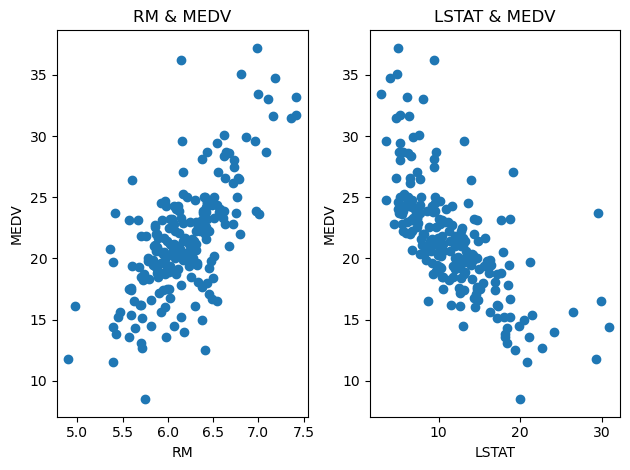

In [154]:
#plt.figure(figsize = (6, 6))

plt.subplot(1,2,1)
plt.scatter(use_data['RM'], use_data['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('RM & MEDV')

plt.subplot(1,2,2)
plt.scatter(use_data['LSTAT'], use_data['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('LSTAT & MEDV')

plt.tight_layout()
plt.show()

In [155]:
# 스케일링 진행하자
# 선형회귀 분석 라쓰고

In [156]:
figure = use_data[['RM','LSTAT']]
target = use_data['MEDV']

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(figure, target, random_state=42)

In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [159]:
X_train = scaled_X_train
X_test = scaled_X_test

### 학습 > 예측 > 성능평가

In [160]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [161]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(train_score, test_score)

#음 ... 0.03 의 점수 차이가 나온다. 조금 아쉽지만 그대로 진행해보겠다.

0.5605604802794295 0.5399605117129869


In [162]:
y_pred = model.predict(X_test)

In [163]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"- R2 score: {r2}")
print(f"- MSE :{mse}")
print(f"- MAE :{mae}")

# 어떠한 규제도 설정하지 않은 채로 했을 떄
# 결과를 보니 r2 값이 0.53이다. 절반.. 흠 좀 더 올려보도록 하자

- R2 score: 0.5399605117129869
- MSE :10.65004036495225
- MAE :2.4038518969287415


##### 어떠한 규제도 설정하지 않은 채로 했을 떄
- 결과를 보니 r2 값이 0.53이다. 절반.. 흠 좀 더 올려보도록 하자
- R2 score: 0.5399605117129869
- MSE :10.65004036495225
- MAE :2.4038518969287415

##### 제거했던 이상치를 다시 복원시키고 돌려봤을 때
- r2 값은 0.61로 올라왔지만 MSE와 MAE는 오히려 증가했다
- R2 score: 0.6127549875719406
- MSE :36.38571758575449
- MAE :3.896355607741455
- score값도 상당히 차이나서 이상치 제거는 그대로 제거 둔 상태로 해보았다.